In [3]:
import torch
from torchvision import models as md, datasets, transforms
from models import TrainConfig, ClTrainer
import wandb

## A Training Pipeline
This notebook contains a simple training pipeline.<br/>
We use wandb to log progress.

In [4]:
wandb.login()

True

###  Create Datasets
Please note that most models work on RGB images!

In [6]:
transform = transforms.Compose([transforms.ToTensor(),])
# Lets make the train and validation split.
train_ds = datasets.CIFAR10("./train_data", train=True, transform=transform, download=True)
val_ds = datasets.CIFAR10("./val_data", train=False, transform=transform, download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./train_data/cifar-10-python.tar.gz to ./train_data


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./val_data/cifar-10-python.tar.gz to ./val_data


In [10]:
conf = TrainConfig(
    lr=1e-5,  # The learning rate to start with.
    max_lr=5e-2,  # The maximal learning rate for the scheduler.
    batch=64,
    epochs=10,
    model="WideResNet50_2",
    dataset="CIFAR10",
)

trainer = ClTrainer(
    train_dataset=train_ds,
    val_dataset=val_ds,
    model=md.wide_resnet50_2(),
    criterion=torch.nn.CrossEntropyLoss,
    optimizer=torch.optim.AdamW,
    scheduler=torch.optim.lr_scheduler.OneCycleLR,
    train_config=conf,
    out_features=10,  # Make sure to adapt this according to your data!!
)

acc,▁▃▅▆█
loss,█▅▄▃▁
lr,▇█▅▂▁
val_acc,▁▄▁▇█
val_loss,▃▂█▁▁
acc,0.73901
loss,0.74233
lr,0.0
val_acc,0.72781
val_loss,0.7793


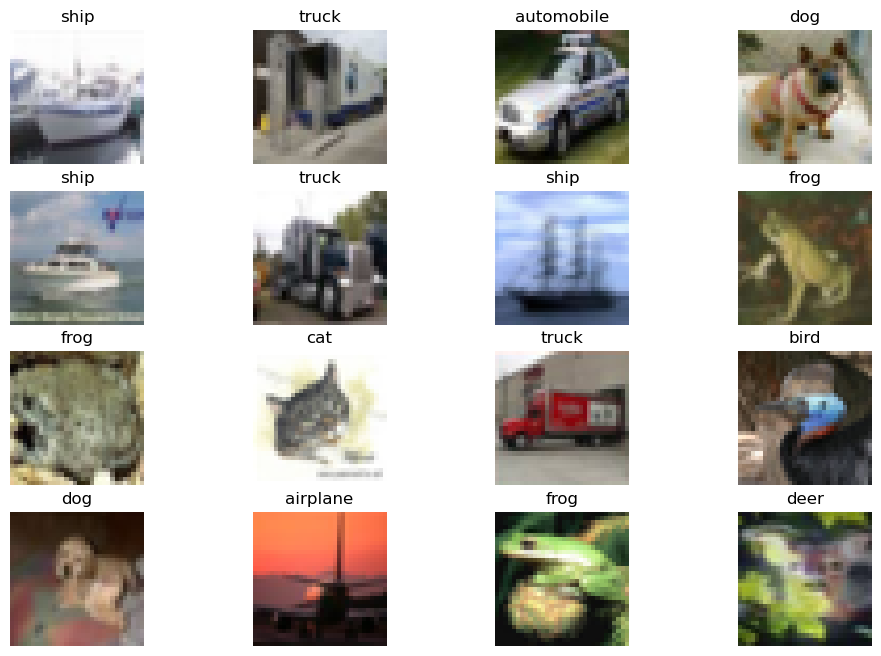

In [11]:
trainer.show_samples()

In [12]:
trainer.train()

100%|██████████| 10/10 [02:31<00:00, 15.16s/it]


In [13]:
trainer.save_model("../../models/wrn_cifar10.pkl")